In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
data_dir = os.getenv("HOME")+'/aiffel/kaggle_kakr_housing/data'

In [3]:
print(os.getenv("HOME"), data_dir)

/aiffel /aiffel/aiffel/kaggle_kakr_housing/data


In [4]:
train_data_path = data_dir + '/train.csv'
test_data_path = data_dir + '/test.csv'

In [5]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [6]:
print(train_data.shape, test_data.shape)

(15035, 21) (6468, 20)


In [7]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [8]:
# 결측치 확인
train_data.isnull().any(axis = 0)

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [9]:
test_data.isnull().any(axis = 0)

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [10]:
# 컬럼 목록 확인!
print(train_data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [12]:
train_data['date'] = train_data['date'].apply(lambda d: int(d[:6]))
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [13]:
test_data['date'] = test_data['date'].apply(lambda d: int(d[:6]))
test_data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,201412,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,201412,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,201405,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,201504,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,201503,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [14]:
del train_data['id']
del test_data['id']

# y = train_data['price']

# del train_data['price']

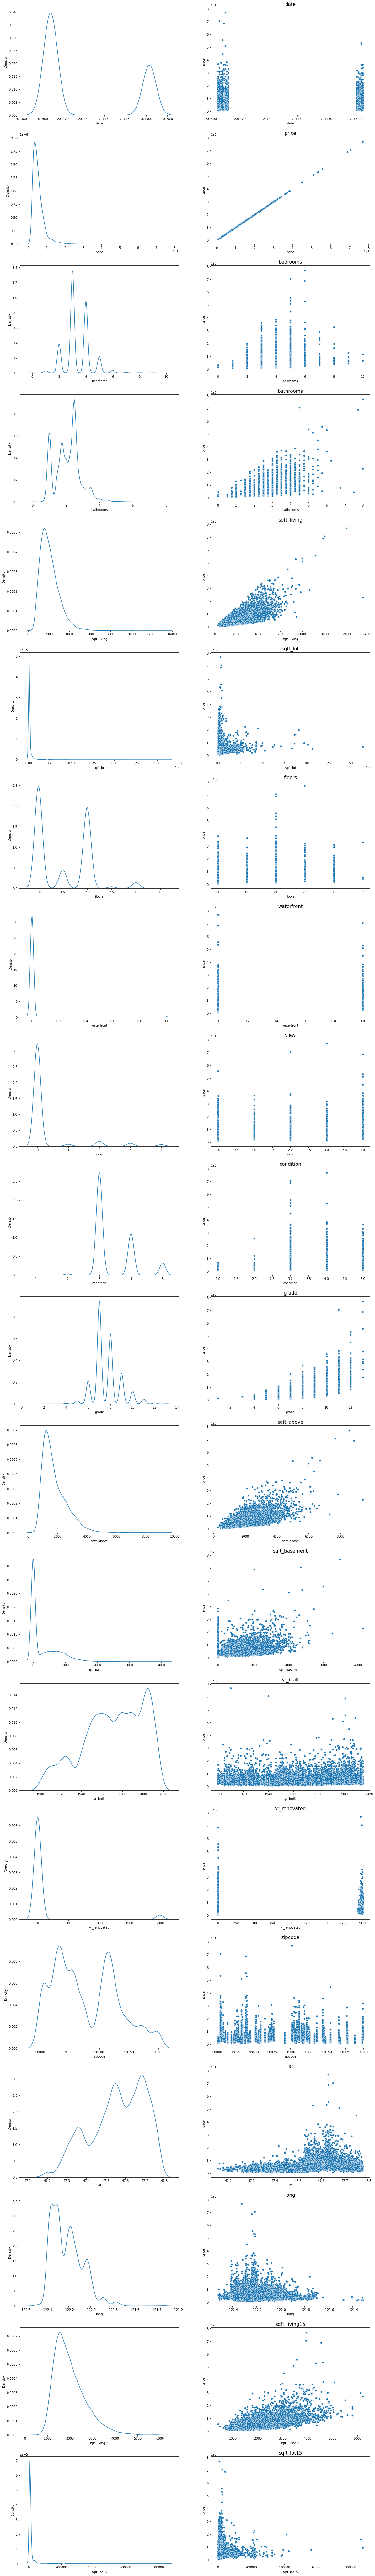

In [20]:
# 컬럼 관찰하기

columns = train_data.columns
fig, ax = plt.subplots(len(columns), 2, figsize=(20, 150))   # 가로스크롤 때문에 그래프 확인이 불편하다면 figsize의 x값을 조절해 보세요. 

for row in range(len(columns)):
    sns.kdeplot(data=train_data[columns[row]], ax=ax[row][0])
    sns.scatterplot(data = train_data, x = columns[row], y = 'price' , ax=ax[row][1])
    ax[row][col].set_title(columns[row], fontsize=15)

In [21]:
skew_columns = [
    "sqft_living",
    "sqft_lot",
    "sqft_above",
    "sqft_basement",
    "sqft_lot15",
    "sqft_living15",
]

In [22]:
for c in skew_columns:
    train_data[c] = np.log1p(train_data[c].values)
    test_data[c] = np.log1p(test_data[c].values)

In [23]:
y = train_data['price']
del train_data['price']

X = train_data

In [24]:
y = np.log1p(y.values)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


In [26]:
from sklearn.model_selection import GridSearchCV


def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=-1):
    # 1. GridSearchCV 모델로 `model`을 초기화합니다.
    grid_model = GridSearchCV(
        model,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=5,
        verbose=verbose,
        n_jobs=n_jobs,
    )

    # 2. 모델을 fitting 합니다.
    grid_model.fit(train, y)

    # 3. params, score에 각 조합에 대한 결과를 저장합니다.
    params = grid_model.cv_results_["params"]
    score = grid_model.cv_results_["mean_test_score"]

    # 4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.
    results = pd.DataFrame(params)
    results["score"] = score
    results["RMSLE"] = np.sqrt(-1 * results["score"])
    results = results.sort_values(by="RMSLE")

    return results

In [ ]:
# xgboost

random_state = 42
xgboost = XGBRegressor(random_state = random_state)

param_grid = {
    "n_estimators": [50, 100, 200, 300, 500, 600, 700, 800, 900, 1000],
    # "learning_rate": [0.01, 0.1, 0.2],
    "max_leaves": [0, 10, 100, 500, 1000, 5000, 10000],
    "max_depth": [5, 10, 15, 20, 30, 40, 50],
    "learning_rate": [0.01, 0.05, 0.1, 0.15],
    "max_depth": [3, 5, 7, 10, 15],
    "gamma": [0, 1, 2, 3],
    "colsample_bytree": [0.8, 0.9],
}
xgboost_gs = my_GridSearch(xgboost, X, y, param_grid)
xgboost_gs

![image-2.png](https://media.discordapp.net/attachments/1172353704448512061/1176714340322258954/2023-11-22_11.20.50.png?ex=656fdfa1&is=655d6aa1&hm=42296fbd2e4c7bdf6fc525156d0b695b381dbbd1dcc8985c18b8d79239ade604&=&width=1922&height=786)

In [ ]:
# lgbm

lgbm = LGBMRegressor(random_state = random_state)
param_grid = {
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90],
    "learning_rate": [0.01, 0.05, 0.1, 0.15],
    "num_leaves": [10, 20, 31, 40, 50, 60, 70],
}
lgbm_gs = my_GridSearch(lgbm, X, y, param_grid)
lgbm_gs

![image.png](https://media.discordapp.net/attachments/1172353704448512061/1176714339965747371/2023-11-22_11.20.55.png?ex=656fdfa0&is=655d6aa0&hm=5e606c858fba8247055768be67194c7a4d85dd01ac385e53d43b1ef0d614b868&=&width=1498&height=938)

In [32]:
random_state = 42
xgb = XGBRegressor(
    max_depth=5,
    n_estimators=900,
    max_leaves=0,
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.05,
    num_boost_round=100,
    random_state=random_state,
)

lgbm = LGBMRegressor(
    max_depth=10,
    n_estimators=500,
    num_leaves=31,
    learning_rate=0.05,
    num_boost_round=1500,
    random_state=random_state,
)

lgbm2 = LGBMRegressor(
    max_depth=10,
    n_estimators=500,
    num_leaves=40,
    learning_rate=0.05,
    num_boost_round=1500,
    random_state=random_state,
)

lgbm3 = LGBMRegressor(
    max_depth=20,
    n_estimators=500,
    num_leaves=40,
    learning_rate=0.05,
    num_boost_round=1500,
    random_state=random_state,
)

lgbm4 = LGBMRegressor(
    max_depth=20,
    n_estimators=500,
    num_leaves=31,
    learning_rate=0.05,
    num_boost_round=1500,
    random_state=random_state,
)

lgbm5 = LGBMRegressor(
    max_depth=40,
    n_estimators=500,
    num_leaves=40,
    learning_rate=0.05,
    num_boost_round=1500,
    random_state=random_state,
)

models = [
    {"model": xgb, "name": "XGBoost"},
    {"model": lgbm, "name": "LightGBM"},
    {"model": lgbm2, "name": "LightGBM2"},
    {"model": lgbm3, "name": "LightGBM3"},
    {"model": lgbm4, "name": "LightGBM4"},
    {"model": lgbm5, "name": "LightGBM5"},
]

In [29]:
def AveragingBlending(models, train_x, train_y, test_x):
    for m in models:
        m["model"].fit(train_x.values, train_y)

    predictions = np.column_stack([
        m["model"].predict(test_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [40]:
def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [31]:
y_pred = AveragingBlending(models, X, y, X)
rmsle(y, y_pred)

[02:32:20] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=1500, num_boost_round=1500 will be ignored. Current value: num_iterations=1500


/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


0.0740258695250696

In [34]:
y_pred = AveragingBlending(models, X, y, test_data)

[02:35:22] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=1500, num_boost_round=1500 will be ignored. Current value: num_iterations=1500


/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [35]:
y_pred

array([13.15108701, 13.09743797, 14.09447444, ..., 13.07805336,
       12.70815253, 12.98283042])

In [37]:
predictions = np.expm1(y_pred)

In [38]:
predictions

array([ 514569.06493174,  487690.33350964, 1321758.5977886 , ...,
        478327.66718799,  330429.79639817,  434881.17673767])

In [39]:
submission_path = data_dir + "/sample_submission.csv"
submission = pd.read_csv(submission_path)
submission["price"] = predictions
submission_csv_path = "{}/submission_{}_RMSLE_{}.csv".format(data_dir, "ensemble", 1)
submission.to_csv(submission_csv_path, index=False)

![image.png](https://cdn.discordapp.com/attachments/1172353704448512061/1176716541287464970/image.png?ex=656fe1ad&is=655d6cad&hm=de7fb5a2d32f3f0bb734ceb81dc7de2c9d2505277d0ba7e5d7152a2701f14337&)